In [227]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn.metrics import mean_squared_error, r2_score

In [228]:
!kaggle datasets download shree1992/housedata -p . --unzip
df = pd.read_csv('data.csv')

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown




  0%|          | 0.00/432k [00:00<?, ?B/s]
100%|██████████| 432k/432k [00:00<00:00, 965kB/s]
100%|██████████| 432k/432k [00:00<00:00, 963kB/s]


# Sin analisis de columnas

## Modelo sin escalar

In [229]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


Solo haremos lo necesario, para que el modelo pueda entrenarse, transformar las columnas a numeros o eliminarlas

In [230]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [231]:
print(len(df["street"].unique()))
print(len(df["city"].unique()))
print(len(df["statezip"].unique()))

4525
44
77


### Target encoding a esas 3 columnas

In [232]:
for col in ['street', 'city', 'statezip', 'country']:
    mean = df.groupby(col)['price'].mean()
    df[col] = df[col].map(mean)


In [233]:
df = df.drop(["date"], axis=1)

In [234]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0,420392.364047,374433.232975,551962.988473
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0,579837.467282,914441.496599,551962.988473
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0,439492.444648,320243.968571,551962.988473
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0,847180.662995,602963.100000,551962.988473
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0,667649.534781,637555.719367,551962.988473


In [235]:
print(f"Precio maximo: {df["price"].max()}")
print(f"Precio minimo: {df["price"].min()}")
print(f"Cantidad de precio minimo: {len(df[df["price"] == df["price"].min()])}")

Precio maximo: 26590000.0
Precio minimo: 0.0
Cantidad de precio minimo: 49


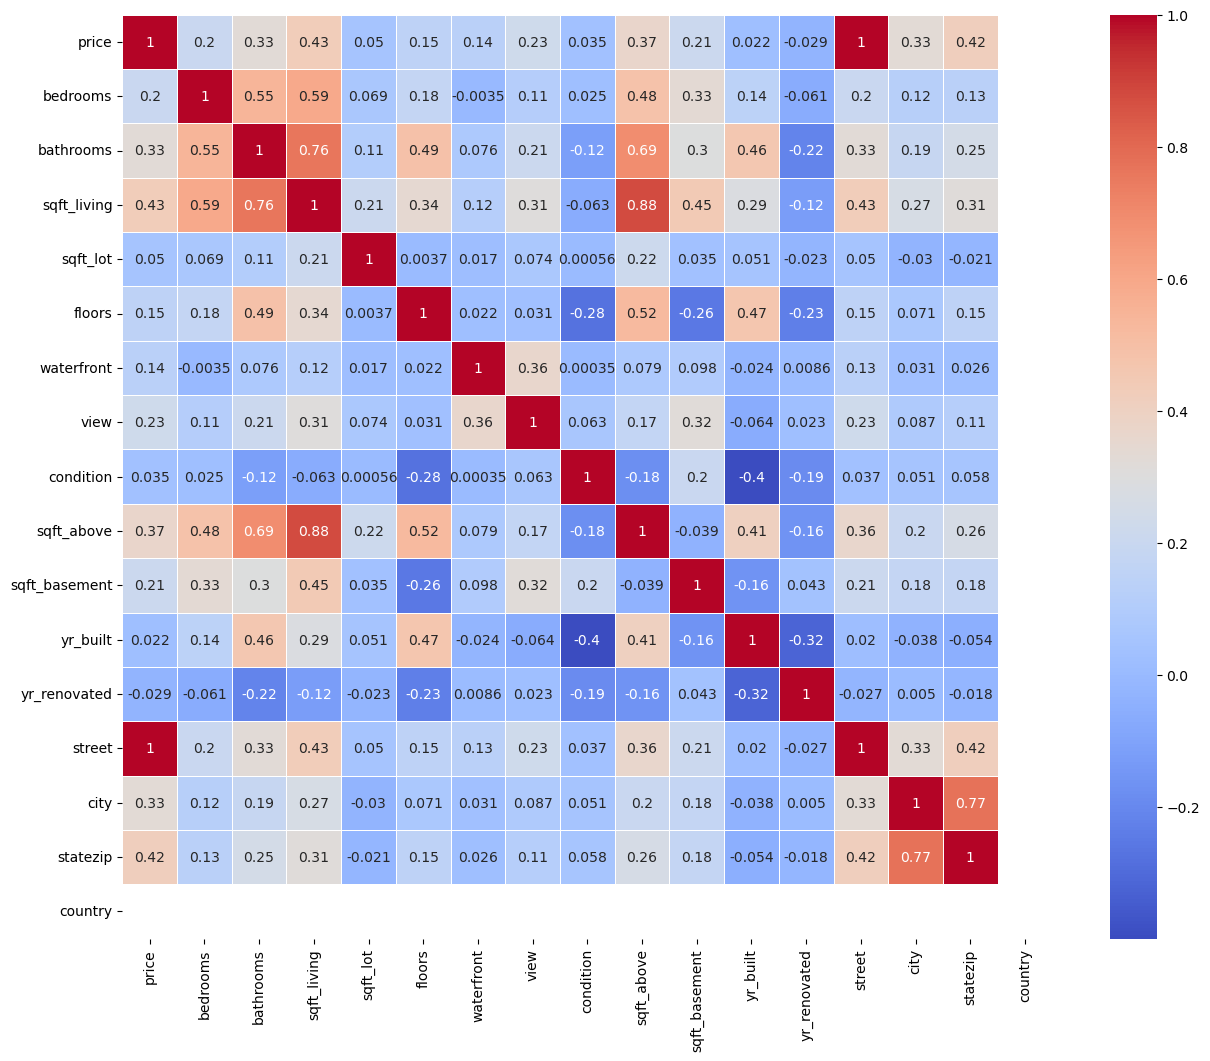

In [236]:
corr = df.corr()

correlation_matrix = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

In [237]:
df = df.drop(df[df["price"] == df["price"].min()].index)

In [238]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

modeloSinProcesar = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200


c:\Users\marco\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 189235707904.0000 - mae: 260440.1406 - val_loss: 1751049216.0000 - val_mae: 31859.2480
Epoch 2/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11403481088.0000 - mae: 24064.7441 - val_loss: 987746368.0000 - val_mae: 15467.0381
Epoch 3/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3008089344.0000 - mae: 20467.4004 - val_loss: 659206656.0000 - val_mae: 7990.0825
Epoch 4/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1569435776.0000 - mae: 9769.5137 - val_loss: 613316032.0000 - val_mae: 6431.8711
Epoch 5/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7956396032.0000 - mae: 18952.8965 - val_loss: 608170240.0000 - val_mae: 5964.6802
Epoch 6/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1793659904.0000 - mae: 11507.7705 - val_loss: 759587520.0000 - val_mae: 12102.7324
Epoch 7/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 731295488.0000 - mae: 8063.0093 - val_loss: 1083447552.0000 - val_mae: 22426.9199
Epoch 8/200
91/91 

In [239]:
y_pred = model.predict(X_test).flatten()

mse1 = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test, y_pred)

print(f"MSE: {mse1:.2f}")
print(f"RMSE: {rmse1:.2f}")
print(f"R² Score: {r21:.2f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE: 711593809.49
RMSE: 26675.72
R² Score: 1.00


## Modelo escalado

In [240]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modeloProcesadoYEscalado = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

y_pred = model.predict(X_test_scaled)

mse2 = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_pred)

print(f"\n\nMSE: {mse2:.2f}")
print(f"RMSE: {rmse2:.2f}")
print(f"R² Score: {r22:.2f}")

Epoch 1/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 815531687936.0000 - mae: 570005.5625 - val_loss: 422616236032.0000 - val_mae: 548215.0625
Epoch 2/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 586433691648.0000 - mae: 556762.1250 - val_loss: 404145111040.0000 - val_mae: 534754.7500
Epoch 3/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 796645523456.0000 - mae: 542698.8750 - val_loss: 338850119680.0000 - val_mae: 484826.1250
Epoch 4/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 911166078976.0000 - mae: 484222.7812 - val_loss: 221906173952.0000 - val_mae: 379152.2500
Epoch 5/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 387063644160.0000 - mae: 352048.3438 - val_loss: 114614042624.0000 - val_mae: 255011.6719
Epoch 6/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 179165659136.0000 - mae: 236982.2812 - val_loss: 70359171072.0000 - val_mae: 192922.8125
Epoch 7/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 465162076160.0000 - mae: 205761.0938 - val_loss:

Evaluar loss en el entrenamiento

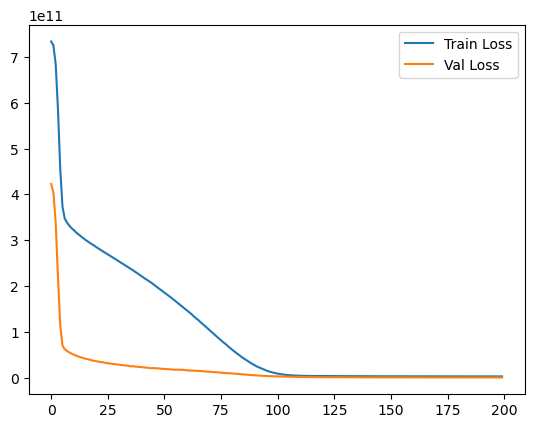

In [241]:
history = modeloProcesadoYEscalado.history

plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

# Con analisis de columnas

In [242]:
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print(f'Valor minimo: {df[col].min()}  -  Valor máximo: {df[col].max()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, '\t', v)

In [243]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0,420392.364047,374433.232975,551962.988473
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0,579837.467282,914441.496599,551962.988473


## Columnas

Numero de habitaciones

In [244]:
describe_columna(df, "bedrooms")

Columna: bedrooms  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 10
Valor minimo: 0.0  -  Valor máximo: 9.0
Valores más frecuentes:
3.0 	 2025
4.0 	 1512
2.0 	 561
5.0 	 338
6.0 	 59
1.0 	 37
7.0 	 14
8.0 	 2
0.0 	 2
9.0 	 1


In [245]:
print(df["price"][df["bedrooms"] == 0])
print(df["price"][df["bedrooms"] == 9])

2365    1095000.0
3209    1295648.0
Name: price, dtype: float64
241    599999.0
Name: price, dtype: float64


C:\Users\marco\AppData\Local\Temp\ipykernel_6684\521490947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=precio_medio_por_camas, palette='Blues')


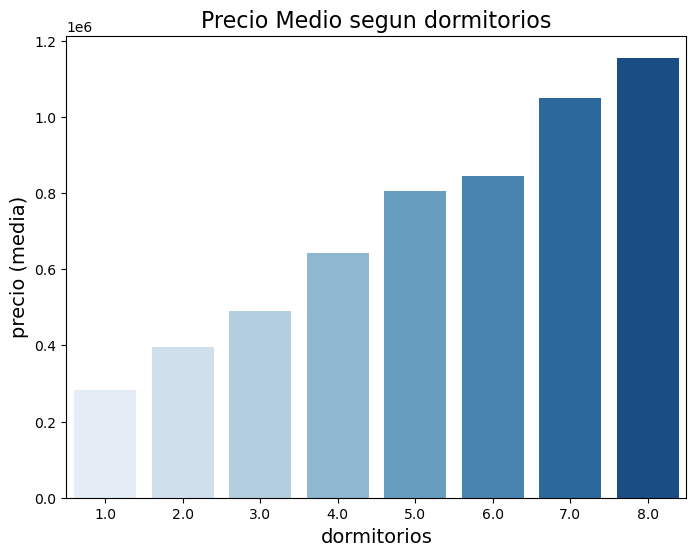

In [246]:
df = df[(df["bedrooms"] > 0) & (df["bedrooms"] < 9)]

plt.figure(figsize=(8, 6))
precio_medio_por_camas = df.groupby('bedrooms')['price'].mean().reset_index()
sns.barplot(x='bedrooms', y='price', data=precio_medio_por_camas, palette='Blues')

plt.title('Precio Medio segun dormitorios', fontsize=16)
plt.xlabel('dormitorios', fontsize=14)
plt.ylabel('precio (media)', fontsize=14)
plt.show()

### Superficie de la casa

In [247]:
describe_columna(df, "sqft_living")

Columna: sqft_living  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 559
Valor minimo: 370  -  Valor máximo: 13540
Valores más frecuentes:
1940 	 32
1720 	 32
1660 	 31
1840 	 31
1410 	 29
2000 	 29
1200 	 28
1480 	 28
1700 	 27
1800 	 27


In [248]:
df[df["sqft_living"] > 13000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2280000.0,7.0,8.0,13540,307752,3.0,0,4,3,9410,4130,1999,0,2280000.0,667649.534781,708179.781214,551962.988473


In [249]:
df = df[df["sqft_living"] < 13000]

C:\Users\marco\AppData\Local\Temp\ipykernel_6684\1372092712.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()


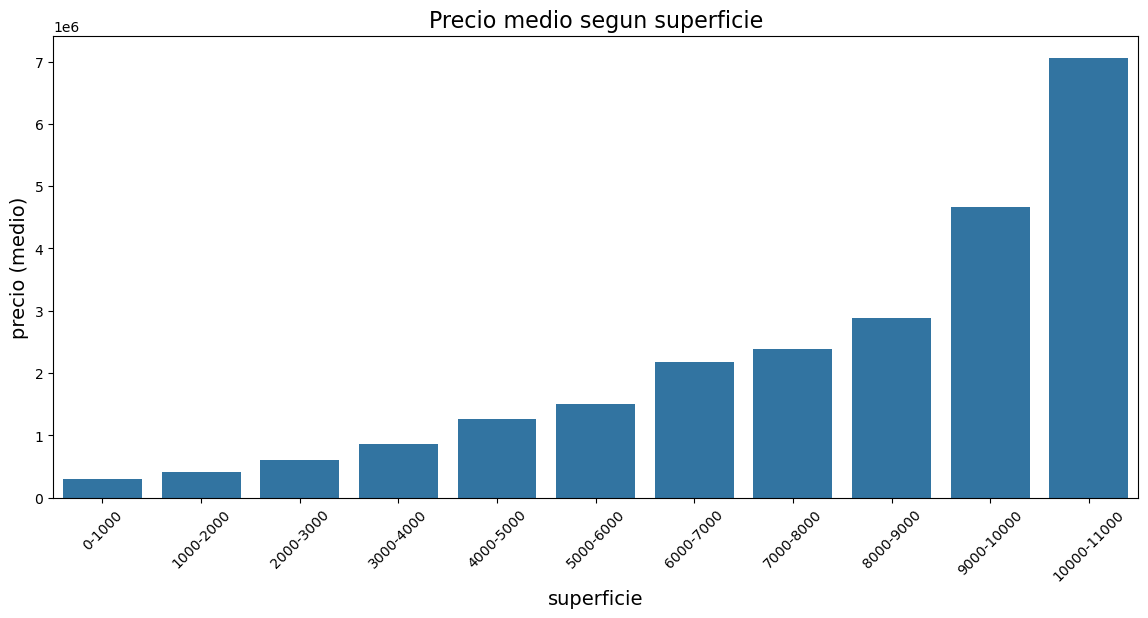

In [250]:
# Definir los bins (rangos)
bins = list(range(0, 12000, 1000)) 
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

df_temp = df.copy()
df_temp['superficie_rango'] = pd.cut(df_temp['sqft_living'], bins=bins, labels=labels, include_lowest=True)

precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='superficie_rango', y='price', data=precio_medio_por_rango)

plt.title('Precio medio segun superficie', fontsize=16)
plt.xlabel('superficie', fontsize=14)
plt.ylabel('precio (medio)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Vemos una correlacion positiva, cuanto mas superficie, mas cuesta la casa

### Superficie total

In [251]:
describe_columna(df, "sqft_lot")

Columna: sqft_lot  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 3083
Valor minimo: 638  -  Valor máximo: 1074218
Valores más frecuentes:
5000 	 80
6000 	 64
4000 	 54
7200 	 49
4800 	 29
9600 	 25
4500 	 25
3000 	 23
5500 	 23
7500 	 22


### Plantas

In [252]:
describe_columna(df, "floors")

Columna: floors  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 6
Valor minimo: 1.0  -  Valor máximo: 3.5
Valores más frecuentes:
1.0 	 2151
2.0 	 1790
1.5 	 439
3.0 	 126
2.5 	 40
3.5 	 1


C:\Users\marco\AppData\Local\Temp\ipykernel_6684\4065238549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='floors', y='price', data=precio_medio_por_camas, palette='Blues')


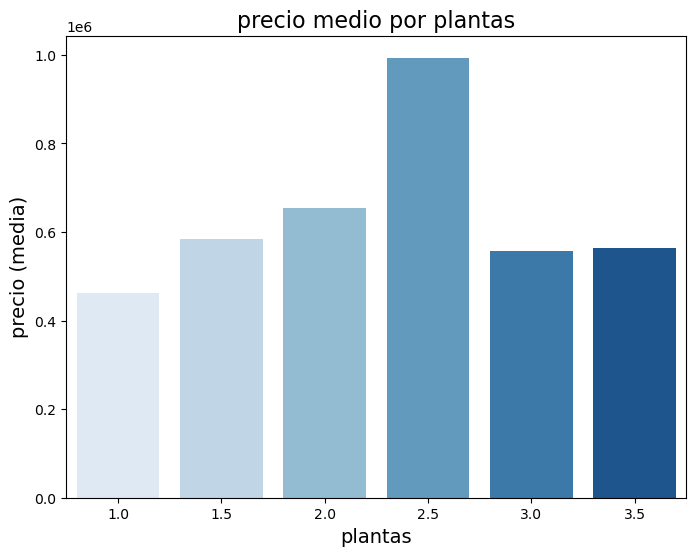

In [253]:
plt.figure(figsize=(8, 6))
precio_medio_por_camas = df.groupby('floors')['price'].mean().reset_index()
sns.barplot(x='floors', y='price', data=precio_medio_por_camas, palette='Blues')

plt.title('precio medio por plantas', fontsize=16)
plt.xlabel('plantas', fontsize=14)
plt.ylabel('precio (media)', fontsize=14)
plt.show()

Una relacion que empieza acode al sentido comun pero que al final no es lo que se espera

In [254]:
media_sqft_living = df[df["floors"] > 2.5]["sqft_living"].mean()
print(f"media superficie de la casa  a partir de 3 plantas: {media_sqft_living:.2f}")

media superficie de la casa  a partir de 3 plantas: 1744.24


Es muy poco, por eso tienen esos precios

### Con vista al agua

In [255]:
describe_columna(df, "waterfront")

Columna: waterfront  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 2
Valor minimo: 0  -  Valor máximo: 1
Valores más frecuentes:
0 	 4517
1 	 30


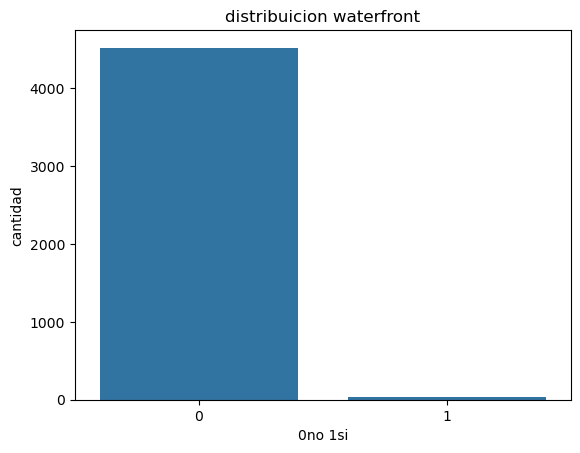

In [256]:
sns.countplot(x='waterfront', data=df)
plt.title('distribuicion waterfront')
plt.xlabel('0no 1si')
plt.ylabel('cantidad')
plt.show()

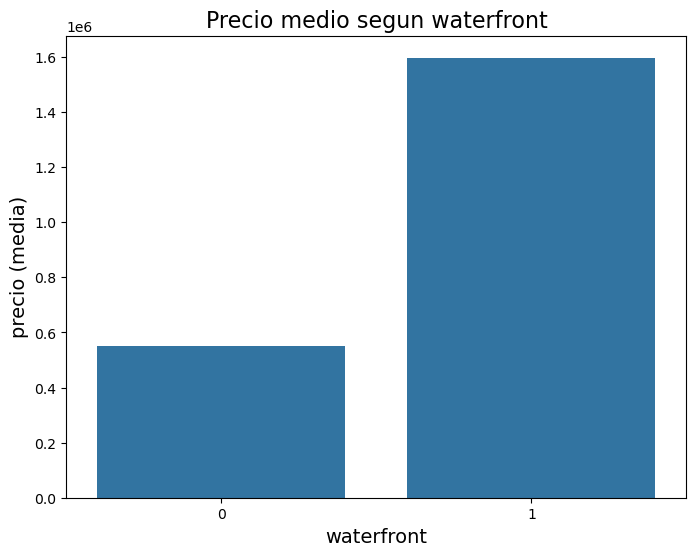

In [257]:
plt.figure(figsize=(8, 6))
precio_medio_por_camas = df.groupby('waterfront')['price'].mean().reset_index()
sns.barplot(x='waterfront', y='price', data=precio_medio_por_camas)

plt.title('Precio medio segun waterfront', fontsize=16)
plt.xlabel('waterfront', fontsize=14)
plt.ylabel('precio (media)', fontsize=14)
plt.show()

In [258]:
len(df[df["waterfront"] > 0])

30

Se ve que cuando la casa tiene vistas al mar el precio aumenta muchisimo

### Vistas

Nota del 0 al 4

In [259]:
describe_columna(df, "view")

Columna: view  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 5
Valor minimo: 0  -  Valor máximo: 4
Valores más frecuentes:
0 	 4101
2 	 200
3 	 115
1 	 69
4 	 62


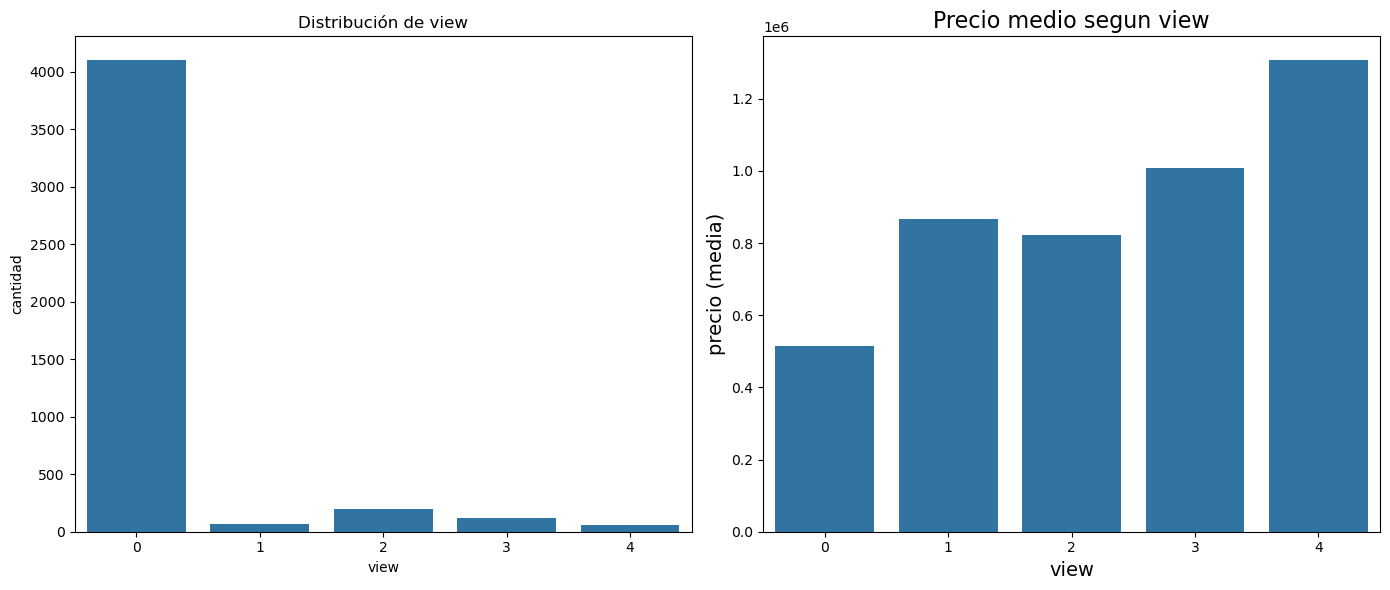

In [260]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax=axes[0], x='view', data=df)
axes[0].set_title('Distribución de view')
axes[0].set_xlabel('view')
axes[0].set_ylabel('cantidad')

precio_medio_por_camas = df.groupby('view')['price'].mean().reset_index()
sns.barplot(ax=axes[1], x='view', y='price', data=precio_medio_por_camas)

axes[1].set_title('Precio medio segun view', fontsize=16)
axes[1].set_xlabel('view', fontsize=14)
axes[1].set_ylabel('precio (media)', fontsize=14)

plt.tight_layout()
plt.show()


Las vistas tambien son influyentes en el precio de la vivienda, mientras mejores vistas mayor es el precio

### Estado de la casa 1-5, 5 es muy bueno

In [261]:
describe_columna(df, "condition")

Columna: condition  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 5
Valor minimo: 1  -  Valor máximo: 5
Valores más frecuentes:
3 	 2847
4 	 1238
5 	 425
2 	 31
1 	 6


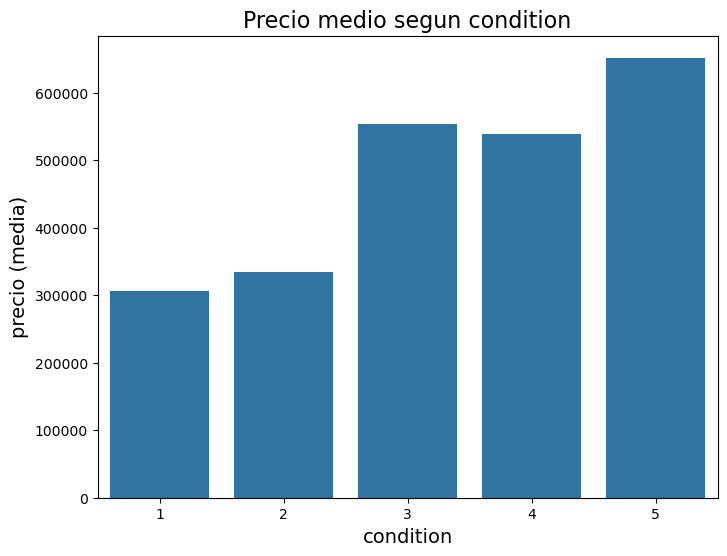

In [262]:
plt.figure(figsize=(8, 6))
precio_medio_por_camas = df.groupby('condition')['price'].mean().reset_index()
sns.barplot(x='condition', y='price', data=precio_medio_por_camas)

plt.title('Precio medio segun condition', fontsize=16)
plt.xlabel('condition', fontsize=14)
plt.ylabel('precio (media)', fontsize=14)
plt.show()

Vemos una tendencia ascendente y tambien un aumento en el valor 3

### Area por encima del nivel del suelo

In [263]:
describe_columna(df, "sqft_above")

Columna: sqft_above  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 507
Valor minimo: 370  -  Valor máximo: 7680
Valores más frecuentes:
1200 	 47
1010 	 47
1140 	 44
1320 	 43
1150 	 42
1300 	 42
1090 	 40
1180 	 40
1400 	 38
1050 	 37


C:\Users\marco\AppData\Local\Temp\ipykernel_6684\900534995.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()


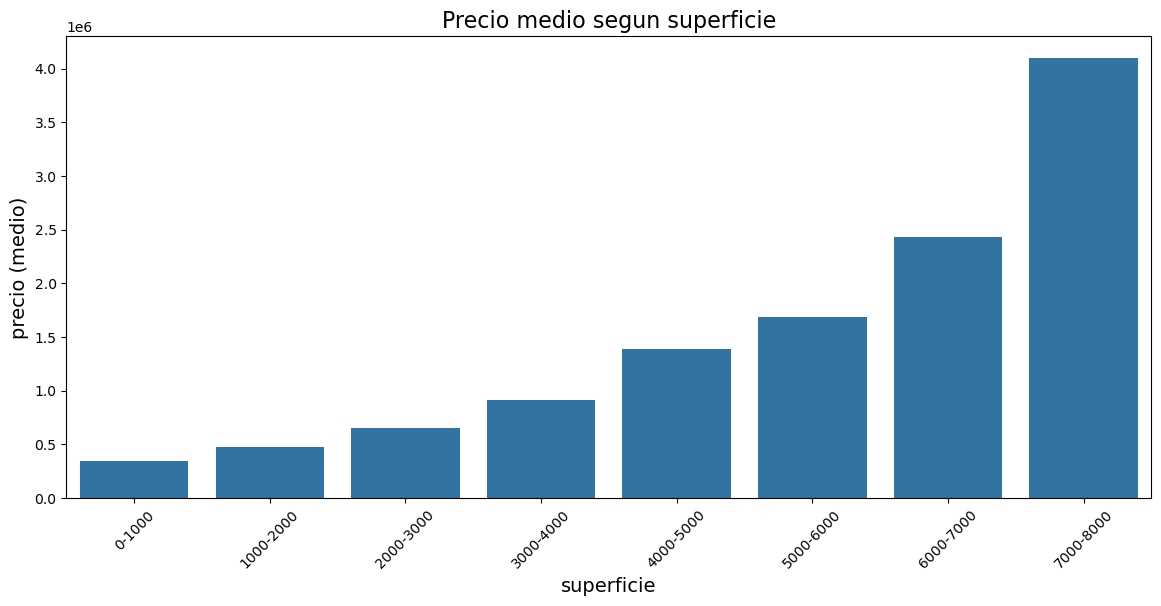

In [264]:
bins = list(range(0, 9000, 1000)) 
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

df_temp = df.copy()
df_temp['superficie_rango'] = pd.cut(df_temp['sqft_above'], bins=bins, labels=labels, include_lowest=True)

precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='superficie_rango', y='price', data=precio_medio_por_rango)

plt.title('Precio medio segun superficie', fontsize=16)
plt.xlabel('superficie', fontsize=14)
plt.ylabel('precio (medio)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Tanto en esta como en otras graficas de superficie vemos que esta muy relacionado con el precio, tenemos otra grafica ascendente

### Superficie sotano

In [265]:
describe_columna(df, "sqft_basement")

Columna: sqft_basement  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 206
Valor minimo: 0  -  Valor máximo: 4820
Valores más frecuentes:
0 	 2716
500 	 53
600 	 44
800 	 42
900 	 39
700 	 36
1000 	 33
400 	 32
550 	 27
750 	 26


C:\Users\marco\AppData\Local\Temp\ipykernel_6684\3719269810.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()


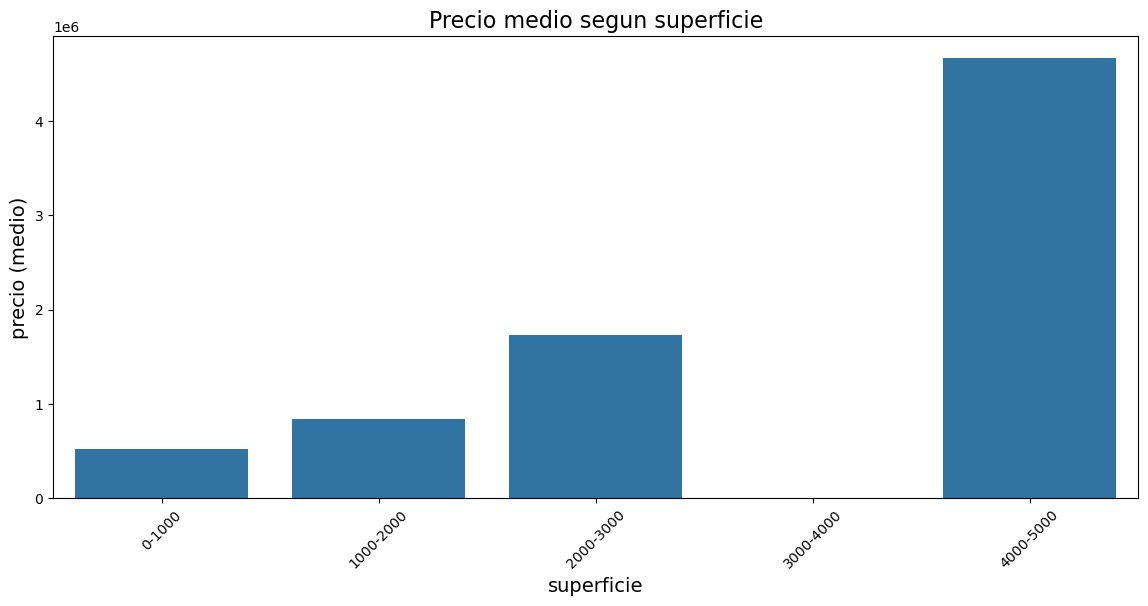

In [266]:
bins = list(range(0, 6000, 1000)) 
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

df_temp = df.copy()
df_temp['superficie_rango'] = pd.cut(df_temp['sqft_basement'], bins=bins, labels=labels, include_lowest=True)

precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='superficie_rango', y='price', data=precio_medio_por_rango)

plt.title('Precio medio segun superficie', fontsize=16)
plt.xlabel('superficie', fontsize=14)
plt.ylabel('precio (medio)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Anio de construccion

In [267]:
describe_columna(df, "yr_built")

Columna: yr_built  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 115
Valor minimo: 1900  -  Valor máximo: 2014
Valores más frecuentes:
2006 	 109
2005 	 103
2007 	 92
2004 	 92
1978 	 90
2003 	 89
2008 	 88
1967 	 82
1977 	 79
2014 	 78


C:\Users\marco\AppData\Local\Temp\ipykernel_6684\1834571525.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()


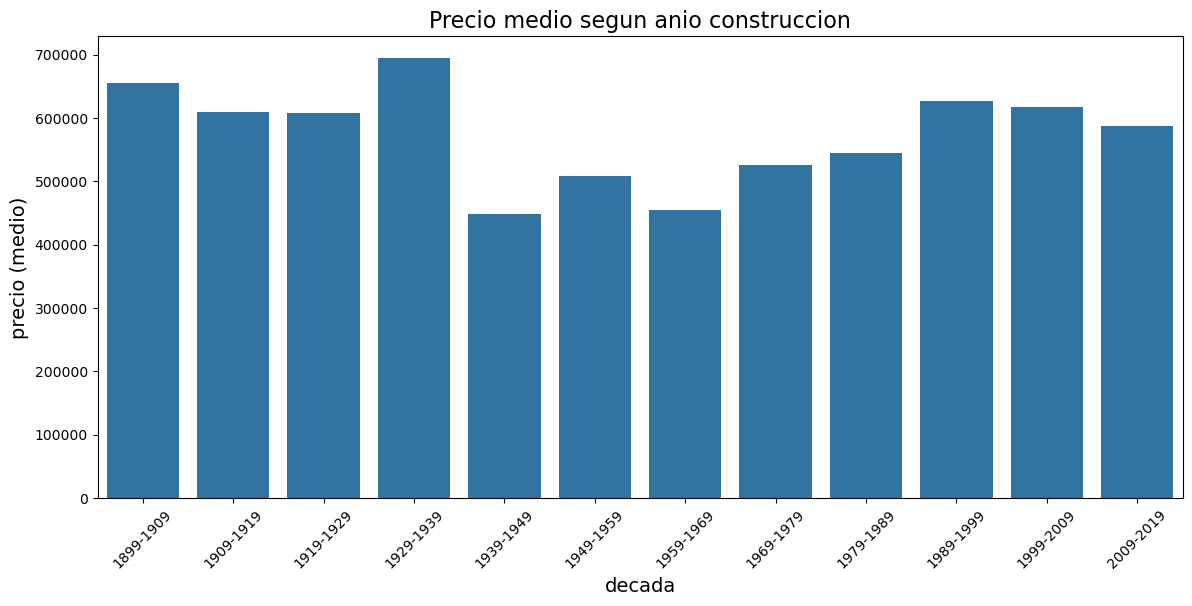

In [268]:
bins = list(range(1899, 2020, 10)) 
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

df_temp = df.copy()
df_temp['superficie_rango'] = pd.cut(df_temp['yr_built'], bins=bins, labels=labels, include_lowest=True)

precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='superficie_rango', y='price', data=precio_medio_por_rango)

plt.title('Precio medio segun anio construccion', fontsize=16)
plt.xlabel('decada', fontsize=14)
plt.ylabel('precio (medio)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

No hay tendencia clara, vemos picos a los extremos y valles en el centro

### Ultimo anio de renovacion (0 si nunca se ha renovado)

In [269]:
describe_columna(df, "yr_renovated")

Columna: yr_renovated  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 59
Valor minimo: 0  -  Valor máximo: 2014
Valores más frecuentes:
0 	 2705
2000 	 169
2003 	 149
2001 	 106
2009 	 105
2005 	 94
2004 	 77
2014 	 72
2006 	 66
2013 	 61


C:\Users\marco\AppData\Local\Temp\ipykernel_6684\452019421.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()


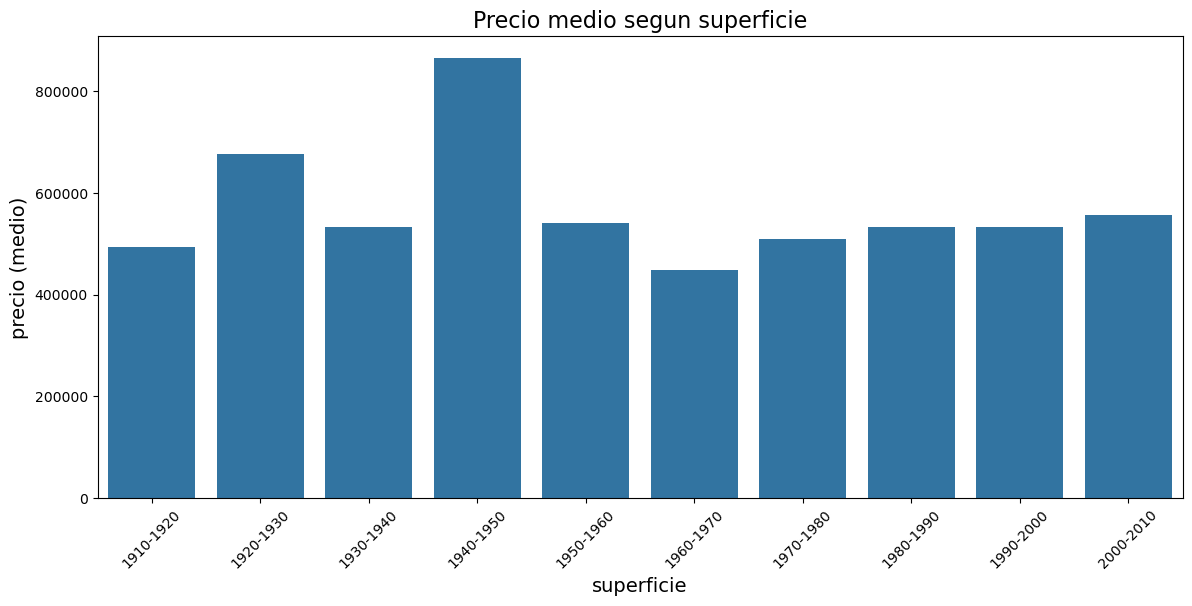

In [270]:
bins = list(range(1910, 2020, 10)) 
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

df_temp = df.copy()
df_temp['superficie_rango'] = pd.cut(df_temp['yr_renovated'], bins=bins, labels=labels, include_lowest=True)

precio_medio_por_rango = df_temp.groupby('superficie_rango')['price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='superficie_rango', y='price', data=precio_medio_por_rango)

plt.title('Precio medio segun superficie', fontsize=16)
plt.xlabel('superficie', fontsize=14)
plt.ylabel('precio (medio)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Tampoco tiene ningun tipo de tendencia

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4547 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4547 non-null   float64
 1   bedrooms       4547 non-null   float64
 2   bathrooms      4547 non-null   float64
 3   sqft_living    4547 non-null   int64  
 4   sqft_lot       4547 non-null   int64  
 5   floors         4547 non-null   float64
 6   waterfront     4547 non-null   int64  
 7   view           4547 non-null   int64  
 8   condition      4547 non-null   int64  
 9   sqft_above     4547 non-null   int64  
 10  sqft_basement  4547 non-null   int64  
 11  yr_built       4547 non-null   int64  
 12  yr_renovated   4547 non-null   int64  
 13  street         4547 non-null   float64
 14  city           4547 non-null   float64
 15  statezip       4547 non-null   float64
 16  country        4547 non-null   float64
dtypes: float64(8), int64(9)
memory usage: 639.4 KB


## Modelo sin escalar

In [272]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

modeloSinProcesar2 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

y_pred = model.predict(X_test).flatten()

mse3 = mean_squared_error(y_test, y_pred)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test, y_pred)

print(f"MSE: {mse3:.2f}")
print(f"RMSE: {rmse3:.2f}")
print(f"R² Score: {r23:.2f}")

c:\Users\marco\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 245491056640.0000 - mae: 219711.0625 - val_loss: 2004036480.0000 - val_mae: 19717.4551
Epoch 2/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11233499136.0000 - mae: 19019.7598 - val_loss: 874693696.0000 - val_mae: 19556.4434
Epoch 3/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2350010368.0000 - mae: 17002.5039 - val_loss: 477004128.0000 - val_mae: 8830.0215
Epoch 4/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1541402496.0000 - mae: 11240.4131 - val_loss: 1067412224.0000 - val_mae: 21519.5723
Epoch 5/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2954464256.0000 - mae: 14712.5322 - val_loss: 5240331776.0000 - val_mae: 57795.3672
Epoch 6/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16379708416.0000 - mae: 50014.6758 - val_loss: 1946546176.0000 - val_mae: 15773.3457
Epoch 7/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12099598336.0000 - mae: 22919.8457 - val_loss: 3359154176.0000 - val_mae: 42583.1

## Modelo scalado

In [273]:
X = df.drop("price", axis=1)
y = df["price"]

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

modeloSinProcesar2 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

y_pred = model.predict(X_test).flatten()

mse4 = mean_squared_error(y_test, y_pred)
rmse4 = np.sqrt(mse4)
r24 = r2_score(y_test, y_pred)

print(f"MSE: {mse4:.2f}")
print(f"RMSE: {rmse4:.2f}")
print(f"R² Score: {r24:.2f}")

Epoch 1/200


c:\Users\marco\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 448942800896.0000 - mae: 547511.3750 - val_loss: 435318390784.0000 - val_mae: 550566.3750
Epoch 2/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 513516535808.0000 - mae: 547598.8750 - val_loss: 432408559616.0000 - val_mae: 548778.8750
Epoch 3/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 595481133056.0000 - mae: 553124.1250 - val_loss: 416002539520.0000 - val_mae: 538837.2500
Epoch 4/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 672353746944.0000 - mae: 550407.5625 - val_loss: 362542170112.0000 - val_mae: 505476.1875
Epoch 5/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 467812777984.0000 - mae: 484169.1250 - val_loss: 257505673216.0000 - val_mae: 429905.1875
Epoch 6/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 450276196352.0000 - mae: 409150.1875 - val_loss: 143818571776.0000 - val_mae: 321724.7812
Epoch 7/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 144138731520.0000 - mae: 295519.0625 - val_loss: 7807740313

## Escalando salida

In [274]:
y = y.values.reshape(-1, 1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

modeloSinProcesar2 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

y_pred = model.predict(X_test).flatten()

mse5 = mean_squared_error(y_test, y_pred)
rmse5 = np.sqrt(mse5)
r25 = r2_score(y_test, y_pred)

print(f"MSE: {mse5:.2f}")
print(f"RMSE: {rmse5:.2f}")
print(f"R² Score: {r25:.2f}")

Epoch 1/200


c:\Users\marco\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1841 - mae: 0.2373 - val_loss: 0.0460 - val_mae: 0.1655
Epoch 2/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0615 - mae: 0.1179 - val_loss: 0.0151 - val_mae: 0.0868
Epoch 3/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0220 - mae: 0.0777 - val_loss: 0.0088 - val_mae: 0.0643
Epoch 4/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - mae: 0.0593 - val_loss: 0.0104 - val_mae: 0.0707
Epoch 5/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - mae: 0.0573 - val_loss: 0.0182 - val_mae: 0.0807
Epoch 6/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0564 - mae: 0.0780 - val_loss: 0.0082 - val_mae: 0.0613
Epoch 7/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1592 - mae: 0.0981 - val_loss: 0.0122 - val_mae: 0.0683
Epoch 8/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3624 - mae: 0.0889 - val_loss: 0.0150 - val_mae: 0.0773
Epoch 9/200
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0445 - mae: 0.0

### Desescalamos salida

In [279]:
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

mse6 = mean_squared_error(y_test, y_pred_original)
rmse6 = np.sqrt(mse6)
r26 = r2_score(y_test, y_pred_original)

print(f"MSE: {mse6:.2f}")
print(f"RMSE: {rmse6:.2f}")
print(f"R² Score: {r26:.2f}")

MSE: 578628817973.76
RMSE: 760676.55
R² Score: -539236753498.10


# Resultados

In [277]:
midf = {
    "Modelo" : [1, 2, 3, 4, 5, 6],
    "MSE" : [mse1, mse2, mse3, mse4, mse5, mse6],
    "MRSE" : [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6],
    "R2" : [r21, r22, r23, r24, r25, r26]
}

midf = pd.DataFrame(midf)
midf

,Modelo,MSE,MRSE,R2
0,1,7.115938e+08,26675.715726,9.952168e-01
1,2,4.473911e+08,21151.622473,9.969927e-01
2,3,1.145187e+10,107013.415671,9.663750e-01
3,4,4.733921e+09,68803.493996,9.861003e-01
4,5,3.525420e-02,0.187761,9.671458e-01
5,6,5.786288e+11,760676.552796,-5.392368e+11
